# Importing Data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/SalesReporting/'
df = pd.read_csv(path + 'sales2019_1.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


# Merge And Clean Data

In [6]:
filepaths = []
frames = []
for file in os.listdir(path):
  filepath = path + file
  filepaths.append(filepath)
  df_temp = pd.read_csv(filepath)
  frames.append(df_temp)
df = pd.concat(frames)

In [7]:
df['Order Date'].str[:2]
df['Month'] = df['Order Date'].str[:2]
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [8]:
print(set(df['Month']))

{nan, '04', '09', '05', '08', '02', '07', '10', '11', '01', '03', '06', 'Or', '12'}


In [9]:
df = df.dropna(how='all')
df = df[df['Month']!='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


# Report

# What was the best month for sales? How much was earned that month?

In [10]:
df['Sales']= pd.to_numeric(df['Quantity Ordered'])*pd.to_numeric(df['Price Each'])
temp = df.pop('Sales')
df.insert(4,'Sales',temp)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,15.36,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,23.90,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [11]:
SalesOfMonth = df.groupby('Month').sum()['Sales']

In [12]:
SalesOfMonth.max()

4613443.34

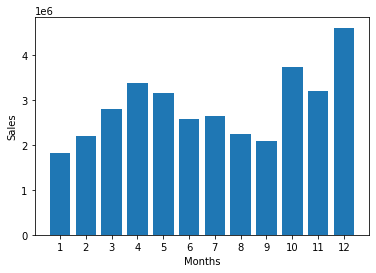

In [13]:
months = range(1,13)
plt.bar(x=months,height=SalesOfMonth)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(months)
plt.show()

# What city has the best sales?


In [14]:
df['City'] =df['Purchase Address'].apply(lambda address:address.split(',')[1])

In [15]:
temp = df.groupby('City').sum()['Sales']

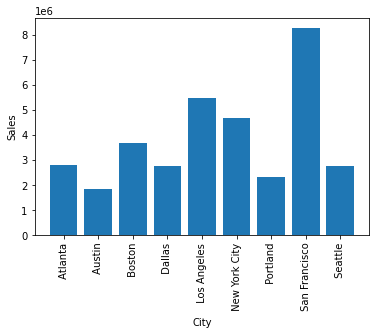

In [16]:
cities = []
for city, value in temp.items():
  cities.append(city)
plt.bar(x=cities,height=temp)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

# What time should we display ads to maximize the likelihood of customer’s buying product?

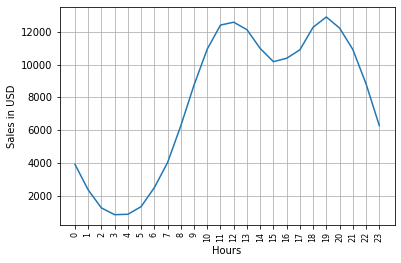

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

# What product sold the most? Why do you think it sold the most?

In [18]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

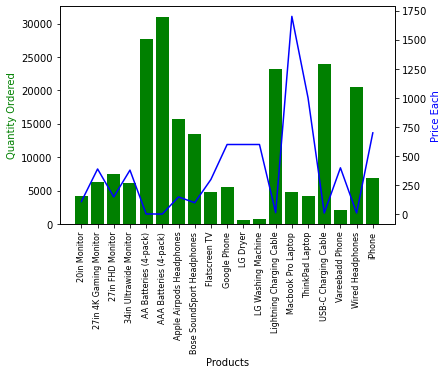

In [19]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()